## 1.0- Introduction

## 2.0- An Overview of Samsung Electronics Co. Ltd.'s Internationalization Strategy
**Rapid Global Expansion:** 

**Development of Local Leadership:** 

**Business Agility:** 

**Development New Technology through International Partnership:** 

	

**(My Findings)**

Details about **Samsung Electronics Co. Ltd. in 2012**
*   total patent count 64500
*   total Turnover lay 1590113.0
*   total turnover 2370656.0
*   total asset 943428.0
*   Number of employees 301




Figure 6 indicates that Samsung Electronics Co. Ltd. had the 2nd most patent count for the year of 2012. 

Figure 7 indicates They had a small turnover in 2012. 

Figure 8 indicates They also had a lower total asset in 2012. 

Figure 9 indicates They had small number of employees in 2012

Figure 10 represents correlation between variables which suggests turnover and turnover lay had the highest positive correlation of 0.99 . In addition, turnover and  total asset had the second highest correlation value of 0.96. Figure 11 and 12 also confirms that as they have a positive correlation line. 

In [2]:
#importing all the needed packages for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#location of the IBM data 
path = '/content/drive/MyDrive/Colab Notebooks/assignment/data/'
#location of all the attribute files
attribute4 = path + 'USPTO_2012_4_proj_attributes_NEW.csv'
edgelist4 = path + 'USPTO_2012_4_proj_edgelist_NEW.csv'

In [5]:
#read all the csv files of edgelist 
colnames = ['From', 'To']
edgelist_df4 = pd.read_csv(edgelist4,names=colnames)
final_edgelist = edgelist_df4
print('total shape of edgelist {}'.format(final_edgelist.shape))

total shape of edgelist (291, 2)


## 3.0- Network analysis techniques and visualizations to describe the network in which it is embedded (indicatively 700 words) 
### (Your written part)

**Company Network Analysis:** 

**Global Value Chain:** 

### (My Findings)

Provided dataset **edgelist** corresponds of:

1. Number of node (companies): 238 and Number of edges(connections): 291

2. From **Figure 1** we can see that the network is a industrial network (define industrial network). From **figure 2** we can see that the network has 2 communities(yellow, green). The community detection was done using **girvan_newman** algoirthm. Under the Girvan-Newman algorithm, the communities in a graph are discovered by iteratively removing the edges of the graph, based on the edge betweenness centrality value. The edge with the highest edge betweenness is removed first. We will cover this algorithm later in the article, but first, let’s understand the concept of “edge betweenness centrality”. (describe the three communities individually got from figure 2 newtworks)

3. Samsung Electronics Co. Ltd. have number of degree = 25 which means it has total of 25  unique direct connections with companies.

In [6]:
import networkx as nx

# Read Our Edgelist
us_graph = nx.from_pandas_edgelist(final_edgelist,source="From",target="To")

In [7]:
def get_graph_info(graph):
    print("Number of nodes:", graph.number_of_nodes())
    print("Number of edges:", graph.number_of_edges())
    print("Available nodes:", list(graph.nodes))
    print("Available edges:", list(graph.edges))
    if type(graph) == nx.classes.digraph.DiGraph:
        print("Connected components:", 
              list(nx.weakly_connected_components(directed_graph)))
    else:
        print("Connected components:", list(nx.connected_components(graph)))
    print("Node degree:", dict(graph.degree()))

In [8]:
get_graph_info(us_graph)

Number of nodes: 238
Number of edges: 291
Available nodes: ['Hyundai Motor Japan R&D Center', 'Hyundai Motor Company', 'Kia Motors Corporation', 'Industry-Academic Cooperation Foundation Yonsei University', 'LG Hausys Ltd.', 'Korea Institute of Science & Technology', 'HYUNDAI MOBIS CO. LTD.', 'SL Lighting Corporation', 'Il Heung Co. Ltd.', 'Myunghwa Ind. Co. Ltd.', 'STMicroelectronics (Mala) Ltd', 'STMICROELECTRONICS S.R.L.', 'Samsung Electronics Co. Ltd.', 'STMicroelectronics (Grenoble 2) SAS', 'GLOBALFOUNDRIES Inc.', 'FREESCALE SEMICONDUCTOR INC.', "COMMISSARIAT A L'ENERGIE ATOMIQUE ET AUX ENERGIES ALTERNATIVES", 'STMICROELECTRONICS (CROLLES 2) SAS', 'STMicoelectronics (Grenoble 2) SAS', 'International Business Machines Corporation', 'STMICROELECTRONICS ASIA PACIFIC PTE. LTD.', 'STMicroelectronics Limited', 'STMicroelectronics (Shenzhen) Manufacturing Co. Ltd.', 'STMicroelectronics International N.V.', 'University of Seoul Industry Cooperation Foundation', 'GENITECH INC.', 'Korea Ele

In [9]:
us_graph.degree('Samsung Electronics Co. Ltd.')

25

In [10]:
us_graph.edges('Samsung Electronics Co. Ltd.')

EdgeDataView([('Samsung Electronics Co. Ltd.', 'STMICROELECTRONICS S.R.L.'), ('Samsung Electronics Co. Ltd.', 'University of Seoul Industry Cooperation Foundation'), ('Samsung Electronics Co. Ltd.', 'GENITECH INC.'), ('Samsung Electronics Co. Ltd.', 'Korea Electric Power Corporation'), ('Samsung Electronics Co. Ltd.', 'Georgia Tech Research Corp.'), ('Samsung Electronics Co. Ltd.', 'Sungkyunkwan University Foundation for Corporate Collaboration'), ('Samsung Electronics Co. Ltd.', 'Korea Advanced Institue of Science & Technology'), ('Samsung Electronics Co. Ltd.', 'SNU R&DB FOUNDATION'), ('Samsung Electronics Co. Ltd.', 'The Regents of the University of California'), ('Samsung Electronics Co. Ltd.', 'Industry-Academic Cooperation Foundation Yonsei University'), ('Samsung Electronics Co. Ltd.', 'GLOBALFOUNDRIES Inc.'), ('Samsung Electronics Co. Ltd.', 'Seoul National University Industry Foundation'), ('Samsung Electronics Co. Ltd.', 'Dongguk University Industry-Academic Cooperation Found

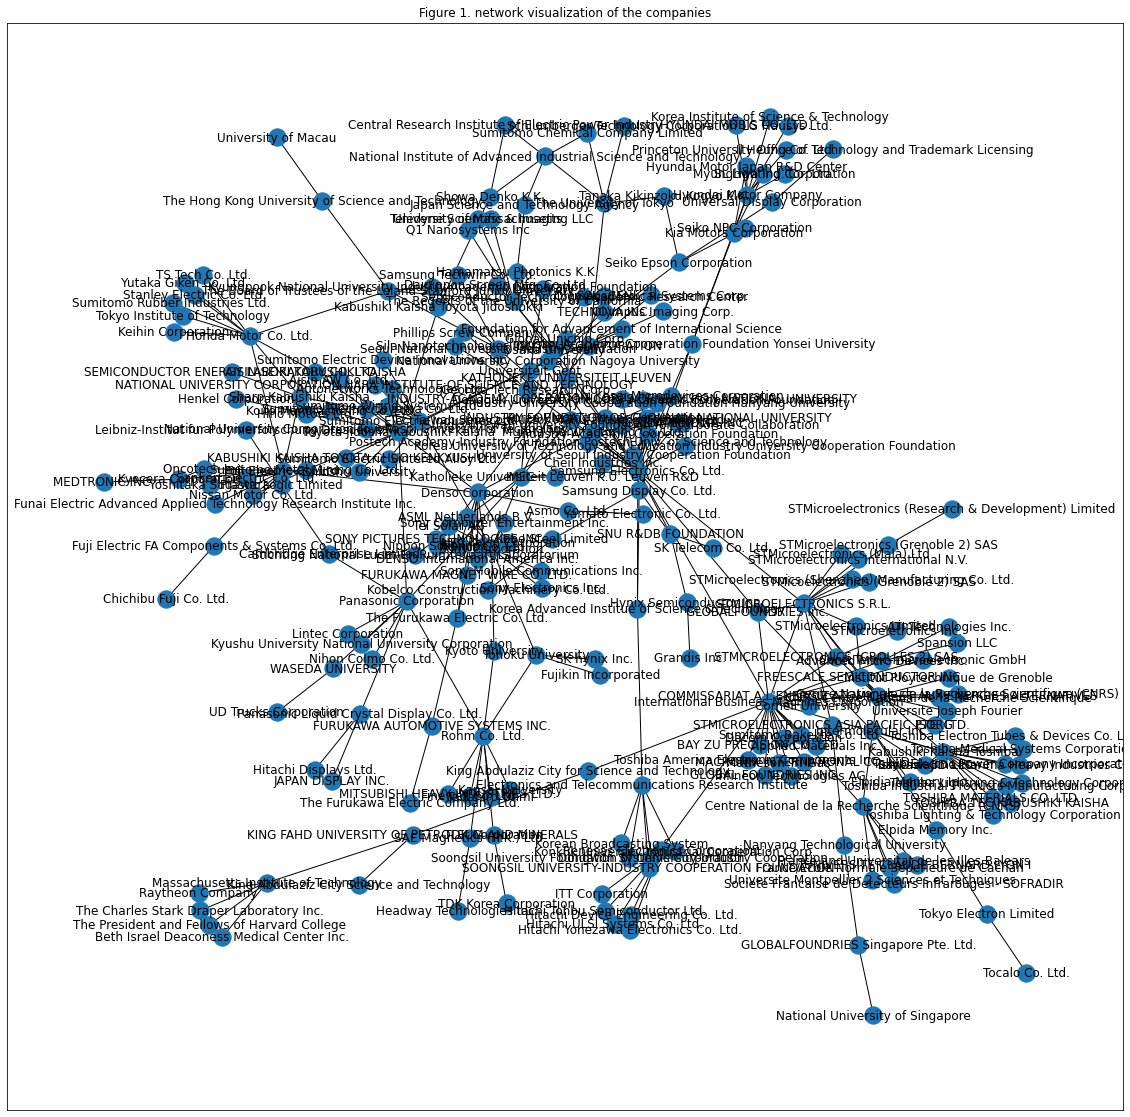

In [11]:
plt.figure(figsize=(20,20))
nx.draw_networkx(us_graph)
plt.title('Figure 1. network visualization of the companies')
plt.show()

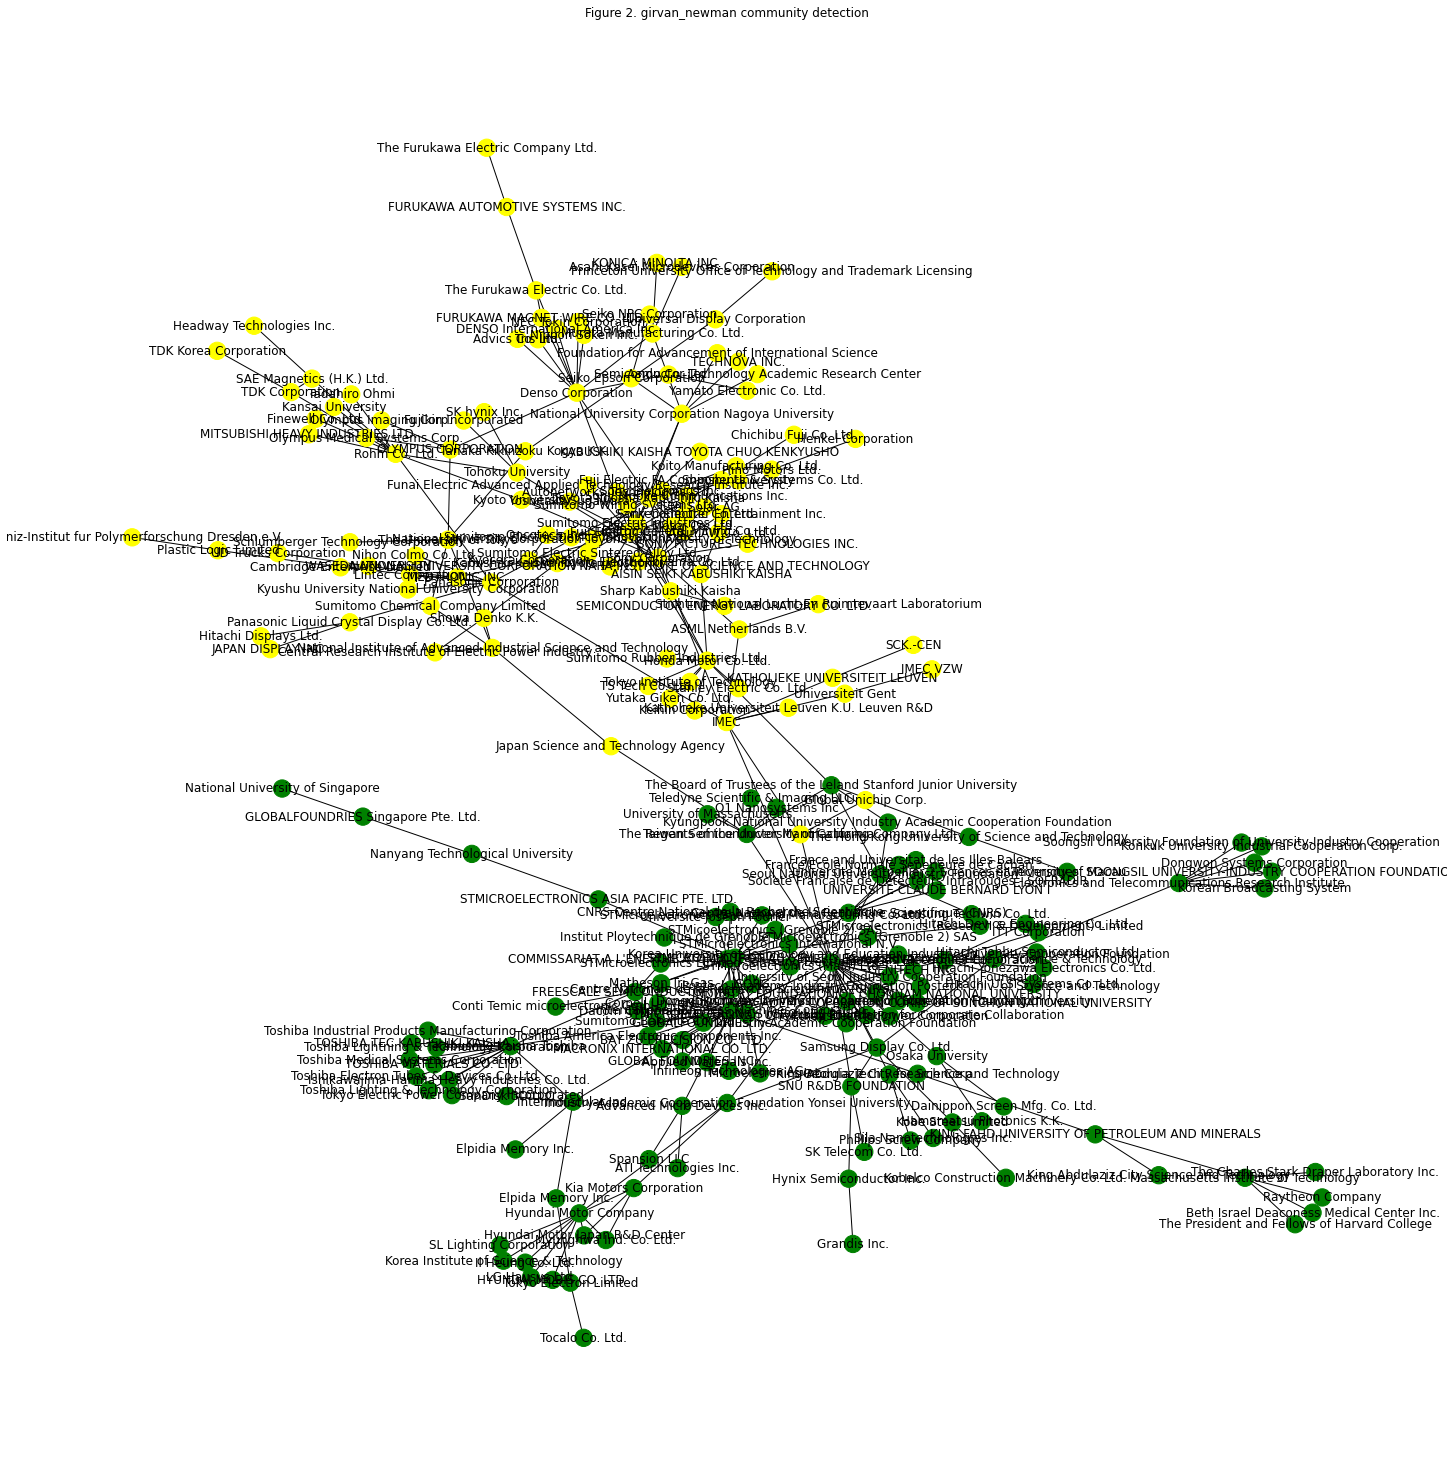

In [12]:
from networkx.algorithms.community.centrality import girvan_newman
 
G = us_graph
communities = girvan_newman(G)
 
node_groups = []
for com in next(communities):
  node_groups.append(list(com))
 
color_map = []
for node in G:
  if node in node_groups[0]:
    color_map.append('green')
  elif node in node_groups[1]:
    color_map.append('yellow')
  else:
    color_map.append('green')

plt.figure(figsize=(20,20))
nx.draw(G, node_color=color_map, with_labels=True)
plt.title('Figure 2. girvan_newman community detection')
plt.show()


## 4.0- Provide a preliminary, exploratory, interpretation of the role played by the company and others of particular note, considering aspects such as their centrality (degree, betweenness, closeness/farness, and eigenvector centrality), location, activity, size and other relevant characteristics (500 words)
**(My findings)**

1. **Degree centrality** is a simple count of the total number of connections linked to a vertex. It is the simplest measure of node connectivity. The higher the degree, the more central the node is. This can be an effective measure, since many nodes with high degrees also have high centrality by other measures. A high degree centrality score simply means that a node has a larger than average number of connections for that graph. In our case higher value of degree centrality means the compnay has more connections from other companies. For the dataset of **edgelist** it can be seen that top 3 best connected company was : **Samsung Electronics Co. Ltd. (0.10548523206751054),International Business Machines Corporation (0.08860759493670885),Toyota Jidosha Kabushiki Kaisha (0.0590717299578059),STMICROELECTRONICS S.R.L. (0.05485232067510548)**. Meanwhile, **Schlumberger Technology Corporation  (9.97800391520966e-05), Olympus Imaging Corp. (9.787738378675292e-05), Olympus Medical Systems Corp. (9.787738378675292e-05), FURUKAWA AUTOMOTIVE SYSTEMS INC. (9.663081250426736e-05), Leibniz-Institut fur Polymerforschung Dresden e.V. (9.499638891031814e-05), Chichibu Fuji Co. Ltd. (8.92411558847718e-05), Yamato Electronic Co. Ltd. (7.899986083904696e-05), Princeton University Office of Technology and Trademark Licensing (1.6414870425636657e-05) and The Furukawa Electric Company Ltd. (1.5444801482379122e-05)** has a relatively lower degree centrality which means it has the lowest connections among other companies of the dataset. Many other comapnies have that same centrality value or higher like

2. **Eigenvector centrality** measures a node’s importance while giving consideration to the importance of its neighbors. Like degree centrality, EigenCentrality measures a node’s influence based on the number of links it has to other nodes in the network. EigenCentrality then goes a step further by also taking into account how well connected a node is, and how many links their connections have, and so on through the network. **International Business Machines Corporation (0.45815061790684364), Samsung Electronics Co. Ltd. (0.43166331303917177), STMICROELECTRONICS S.R.L. (0.33898131275665516)** had the eigenvector centrality which indicates that they are the most important companies in the network. It can be seen that the ranking of comapanies based on Degree of centrality and eigenvector centrality is quite simmilar. It's because the most connected companies are the ones who are more important in the network.    

3. **Betweenness Centrality** is a measure of centrality in a graph based on shortest paths. it is a way of detecting the amount of influence a company has over the flow of information in a network. It is often used to find company that serve as a bridge from one part of a network to another. it calculates unweighted shortest paths between all pairs of company in a network. Each node receives a score, based on the number of shortest paths that pass through the node. Companies that more frequently lie on shortest paths between other companies will have higher betweenness centrality scores. In our dataset **Samsung Electronics Co. Ltd. (0.6551967865741732), IMEC (0.3830877970869391),International Business Machines Corporation (0.3510751150206202)** had the highest betweenness score and  they are the ones who influence the flow of information around the network. They are the ones whose removal from the network will most disrupt communications between other companies because they are the top connected companies. 

4. **Closeness centrality** indicates how close a comapny is to all other companies in the network.It captures the average distance between each company and every other companies in the network. If information needed to flow through the network, some company  would be able to get a message to all the other companies relatively quickly (i.e., in few steps), whereas others may require many steps. Top 4 closely centered Companies were : **Samsung Electronics Co. Ltd. (0.3106159895150721), IMEC (0.2907975460122699),International Business Machines Corporation (0.27147766323024053)**. So, these companies with high closeness centrality is literally close to other comapnies. Comapnies with high closeness have, on average, short paths to many other companies, which can be helpful for disseminating resources quickly. 

5. Figure 3 shows the Shortest path from Samsung Electronics Co. Ltd. to their connections 

In [13]:
# degree_centrality
most_influential = nx.degree_centrality(us_graph)
for w in sorted(most_influential, key=most_influential.get, reverse=True):
    print(w, most_influential[w])

Samsung Electronics Co. Ltd. 0.10548523206751054
International Business Machines Corporation 0.08860759493670885
Toyota Jidosha Kabushiki Kaisha 0.0590717299578059
STMICROELECTRONICS S.R.L. 0.05485232067510548
Kabushiki Kaisha Toshiba 0.05485232067510548
Denso Corporation 0.050632911392405056
Sumitomo Electric Industries Ltd. 0.04641350210970464
Fuji Electric Co. Ltd. 0.04641350210970464
COMMISSARIAT A L'ENERGIE ATOMIQUE ET AUX ENERGIES ALTERNATIVES 0.04219409282700422
Honda Motor Co. Ltd. 0.04219409282700422
Sony Côrporation 0.04219409282700422
Hyundai Motor Company 0.03797468354430379
Panasonic Corporation 0.03797468354430379
Rohm Co. Ltd. 0.03797468354430379
IMEC 0.03375527426160337
National University Corporation Nagoya University 0.02953586497890295
Centre National de la Recherche Scientifique (CNRS) 0.02953586497890295
FREESCALE SEMICONDUCTOR INC. 0.025316455696202528
The Regents of the University of California 0.025316455696202528
Electronics and Telecommunications Research Inst

In [14]:
# eigenvector_centrality
most_important_link = nx.eigenvector_centrality(us_graph, max_iter=500)
for w in sorted(most_important_link, key=most_important_link.get, reverse=True):
    print(w, most_important_link[w])

International Business Machines Corporation 0.45815061790684364
Samsung Electronics Co. Ltd. 0.43166331303917177
STMICROELECTRONICS S.R.L. 0.33898131275665516
COMMISSARIAT A L'ENERGIE ATOMIQUE ET AUX ENERGIES ALTERNATIVES 0.24049368831235046
FREESCALE SEMICONDUCTOR INC. 0.21001497193320234
GLOBALFOUNDRIES Inc. 0.20634527801997227
STMICROELECTRONICS (CROLLES 2) SAS 0.16942541947274026
Kabushiki Kaisha Toshiba 0.16121587833061965
Centre National de la Recherche Scientifique (CNRS) 0.12872153693742247
Samsung Display Co. Ltd. 0.11557660137922562
IMEC 0.10135755123211557
Industry-Academic Cooperation Foundation Yonsei University 0.09418651953560649
SNU R&DB FOUNDATION 0.09180324931275134
Korea Advanced Institue of Science & Technology 0.08969358932713908
STMicroelectronics Limited 0.08737076319126642
Taiwan Semiconductor Manufacturing Company Ltd. 0.08703428765505272
Sumitomo Bakelite Co. Ltd. 0.08671303033783213
Dacom Corporation 0.08671303033783213
Renesas Electronics Corporation 0.08348

In [15]:
# betweenness_centrality
best_connector = nx.betweenness_centrality(us_graph)
for w in sorted(best_connector, key=best_connector.get, reverse=True):
    print(w, best_connector[w])


Samsung Electronics Co. Ltd. 0.6551967865741732
IMEC 0.3830877970869391
International Business Machines Corporation 0.3510751150206202
Panasonic Corporation 0.2980607404228946
Toyota Jidosha Kabushiki Kaisha 0.23410808362535457
Sony Côrporation 0.13403895206083608
Denso Corporation 0.12950964266132683
STMICROELECTRONICS S.R.L. 0.11945457579441705
The Regents of the University of California 0.11744737657631914
Honda Motor Co. Ltd. 0.1163341200028606
The Board of Trustees of the Leland Stanford Junior University 0.10905146725786072
Sumitomo Electric Industries Ltd. 0.1041931869651243
Kabushiki Kaisha Toshiba 0.08358959689146352
Fuji Electric Co. Ltd. 0.08100908245726965
Industry-Academic Cooperation Foundation Yonsei University 0.07337481227204463
National University Corporation Nagoya University 0.07197430212877544
Rohm Co. Ltd. 0.0702817707215905
Seoul National University Industry Foundation 0.06068201864168385
King Abdulaziz City for Science and Technology 0.05756990631481085
Hyundai 

In [16]:
# closeness_centrality
closseness = nx.closeness_centrality(us_graph)
for w in sorted(closseness, key=closseness.get, reverse=True):
    print(w, closseness[w])


Samsung Electronics Co. Ltd. 0.3106159895150721
IMEC 0.2907975460122699
International Business Machines Corporation 0.27147766323024053
Panasonic Corporation 0.2702394526795895
The Regents of the University of California 0.26274944567627495
STMICROELECTRONICS S.R.L. 0.26158940397350994
Taiwan Semiconductor Manufacturing Company Ltd. 0.26043956043956046
Sony Côrporation 0.2584514721919302
GLOBALFOUNDRIES Inc. 0.25732899022801303
Seoul National University Industry Foundation 0.25511302475780406
Toyota Jidosha Kabushiki Kaisha 0.24661810613943808
Samsung Display Co. Ltd. 0.2433264887063655
Industry-Academic Cooperation Foundation Yonsei University 0.24233128834355827
Korea Advanced Institue of Science & Technology 0.24085365853658536
SNU R&DB FOUNDATION 0.23939393939393938
Georgia Tech Research Corp. 0.23819095477386934
Osaka University 0.23819095477386934
Sumitomo Electric Industries Ltd. 0.23795180722891565
University of Seoul Industry Cooperation Foundation 0.23723723723723725
GENITECH

In [17]:
# What is the shortest connection between Samsung Electronics Co. Ltd. and Infineon Technologies AG 
nx.shortest_path(us_graph,"Samsung Electronics Co. Ltd.","Infineon Technologies AG")

['Samsung Electronics Co. Ltd.',
 'International Business Machines Corporation',
 'Infineon Technologies AG']

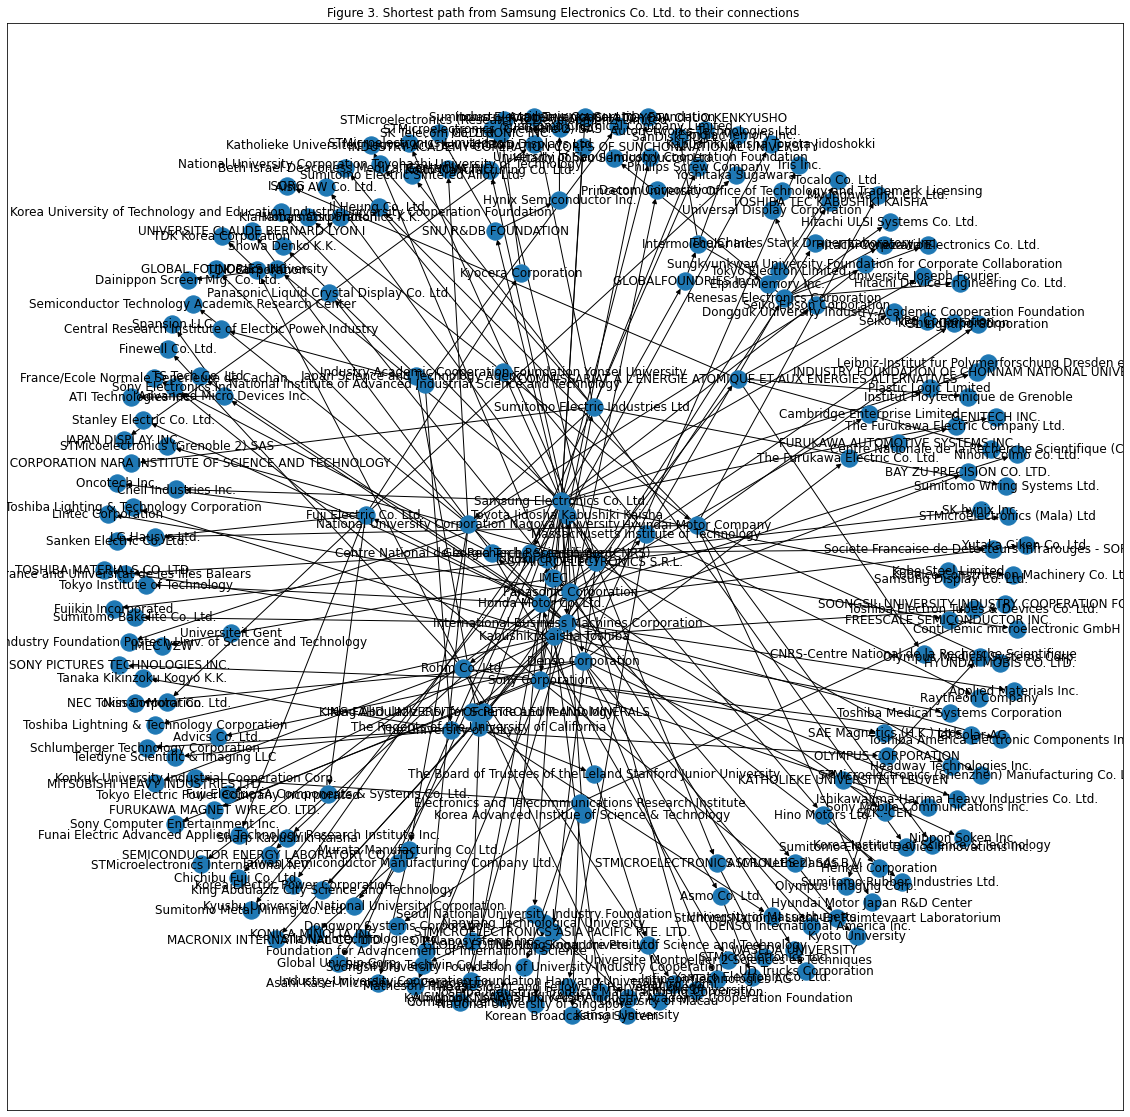

In [18]:
group1 = nx.bfs_tree(us_graph,"Samsung Electronics Co. Ltd.")
plt.figure(figsize=(20,20))
nx.draw_networkx(group1)
plt.title('Figure 3. Shortest path from Samsung Electronics Co. Ltd. to their connections ')
plt.show()

Attribute dataset had total 215 companies with 11 features initially. Among them there was an unnecessary feature named Unnamed: 10 . So we need dropped the column. 

In [31]:
df = pd.read_csv(attribute4)
df = df.drop(columns=['Unnamed: 10'])
print('total shape of attributes {}'.format(df.shape))


total shape of attributes (215, 10)


Figure 4 indicates that the attribute dataset had missing values in R&D_2012, Employees_2012, Turnover_2012, Total_assets_2012, Turnover_lay and Country_code. Among them R&D_2012 had the highest missing values with 58% and country_code had the least with 12%. 

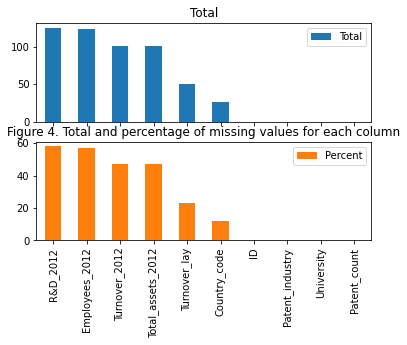

In [20]:
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

axes = missing_data.plot.bar( subplots=True)

plt.title('Figure 4. Total and percentage of missing values for each column')
axes[1].legend(loc=1) 
plt.show()

Figure 5. indicates that the dataset had  the highest number of companies situated at Country code 4 and the lowest at Country code 10. 

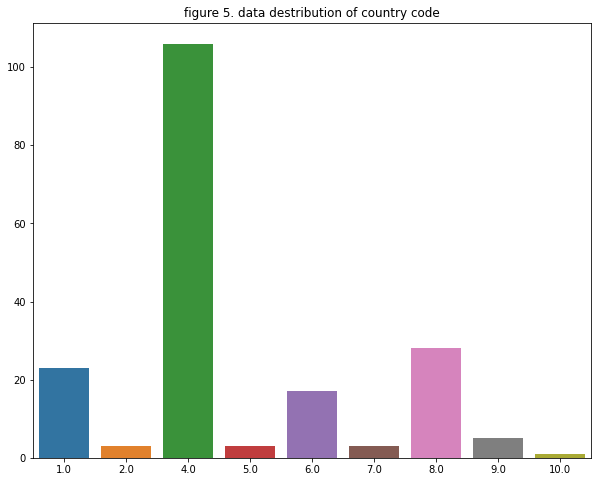

In [21]:
plt.figure(figsize=(10,8))
plt.title('figure 5. data destribution of country code')
# Country_code
sns.barplot(x=df.Country_code.value_counts().index, y=df.Country_code.value_counts().values)
plt.show()

In [22]:
samsunge_df = df[df['ID']=='Samsung Electronics Co. Ltd.']

samsunge_df

ID  Patent_industry  ...  R&D_2012  Country_code
16  Samsung Electronics Co. Ltd.                4  ...       NaN           4.0

[1 rows x 10 columns]

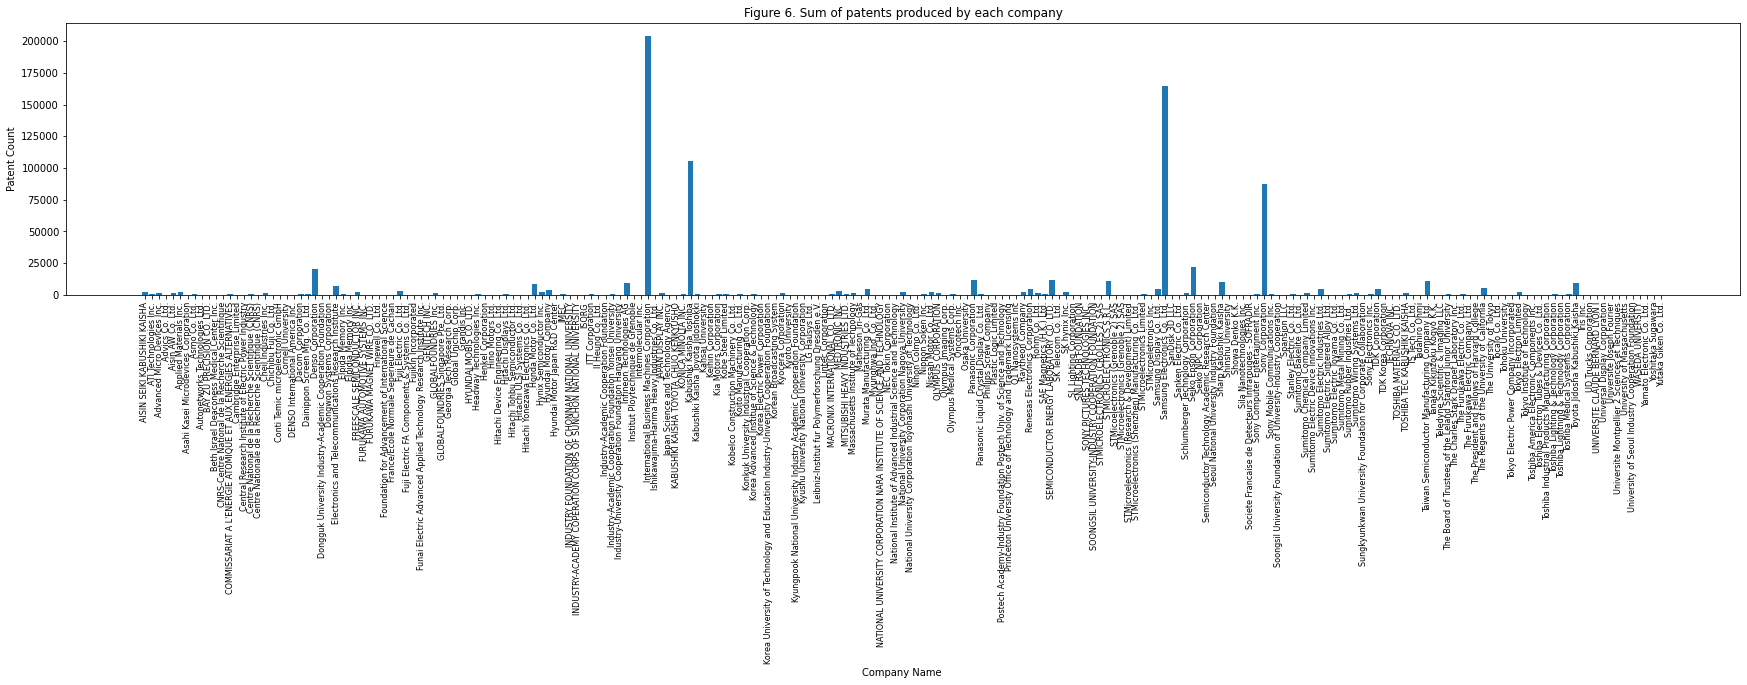

In [23]:
keys = [company for company, df in df.groupby(['ID'])]
plt.figure(figsize=(30,5))
plt.bar(keys,df.groupby(['ID']).sum()['Patent_count'])
plt.ylabel('Patent Count')
plt.xlabel('Company Name ')
plt.xticks(keys, rotation='vertical', size=8)
plt.title('Figure 6. Sum of patents produced by each company')
plt.show()

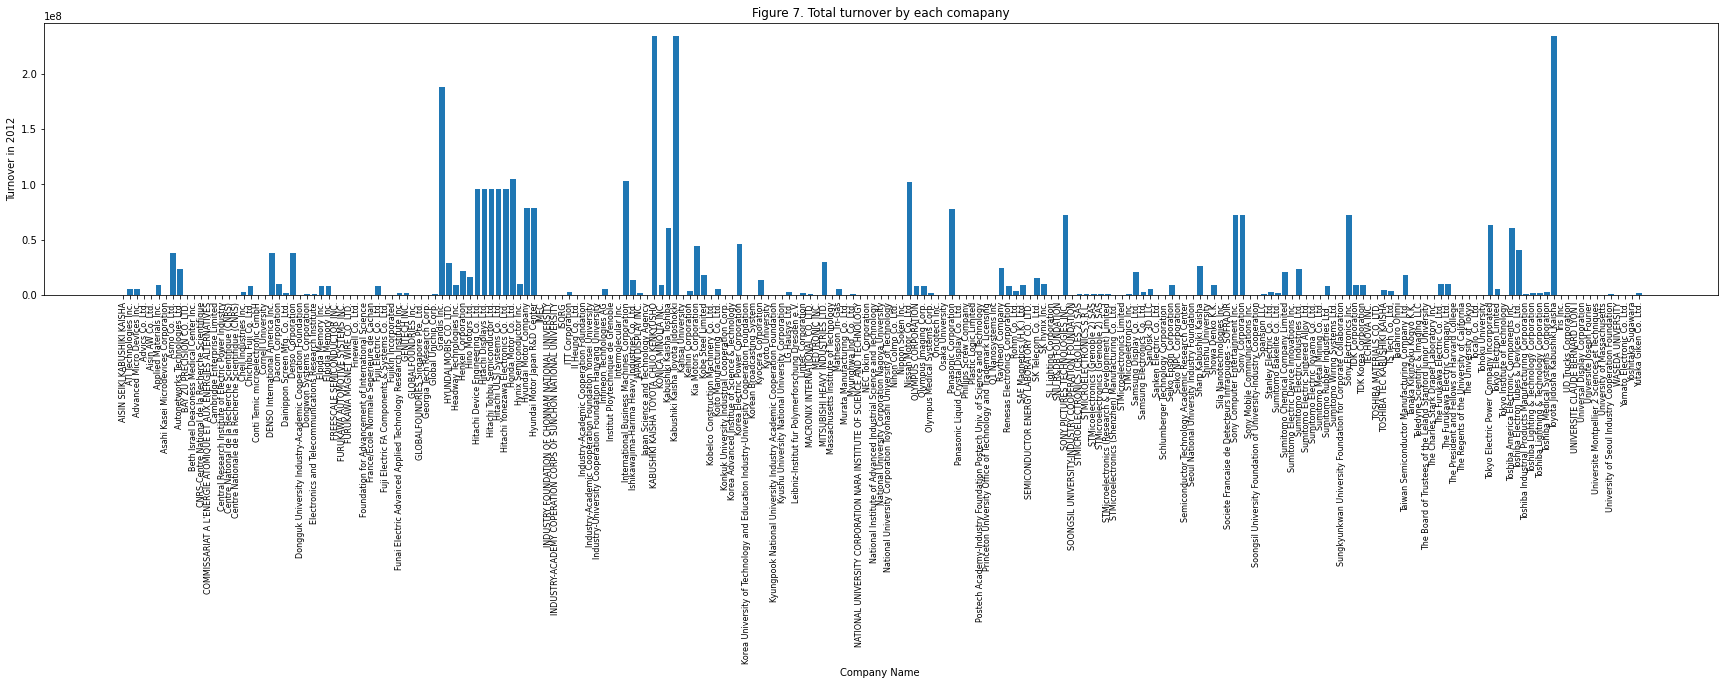

In [24]:
keys = [company for company, df in df.groupby(['ID'])]
plt.figure(figsize=(30,5))
plt.bar(keys,df.groupby(['ID']).sum()['Turnover_2012'])
plt.ylabel('Turnover in 2012')
plt.xlabel('Company Name ')
plt.xticks(keys, rotation='vertical', size=8)
plt.title('Figure 7. Total turnover by each comapany')
plt.show()

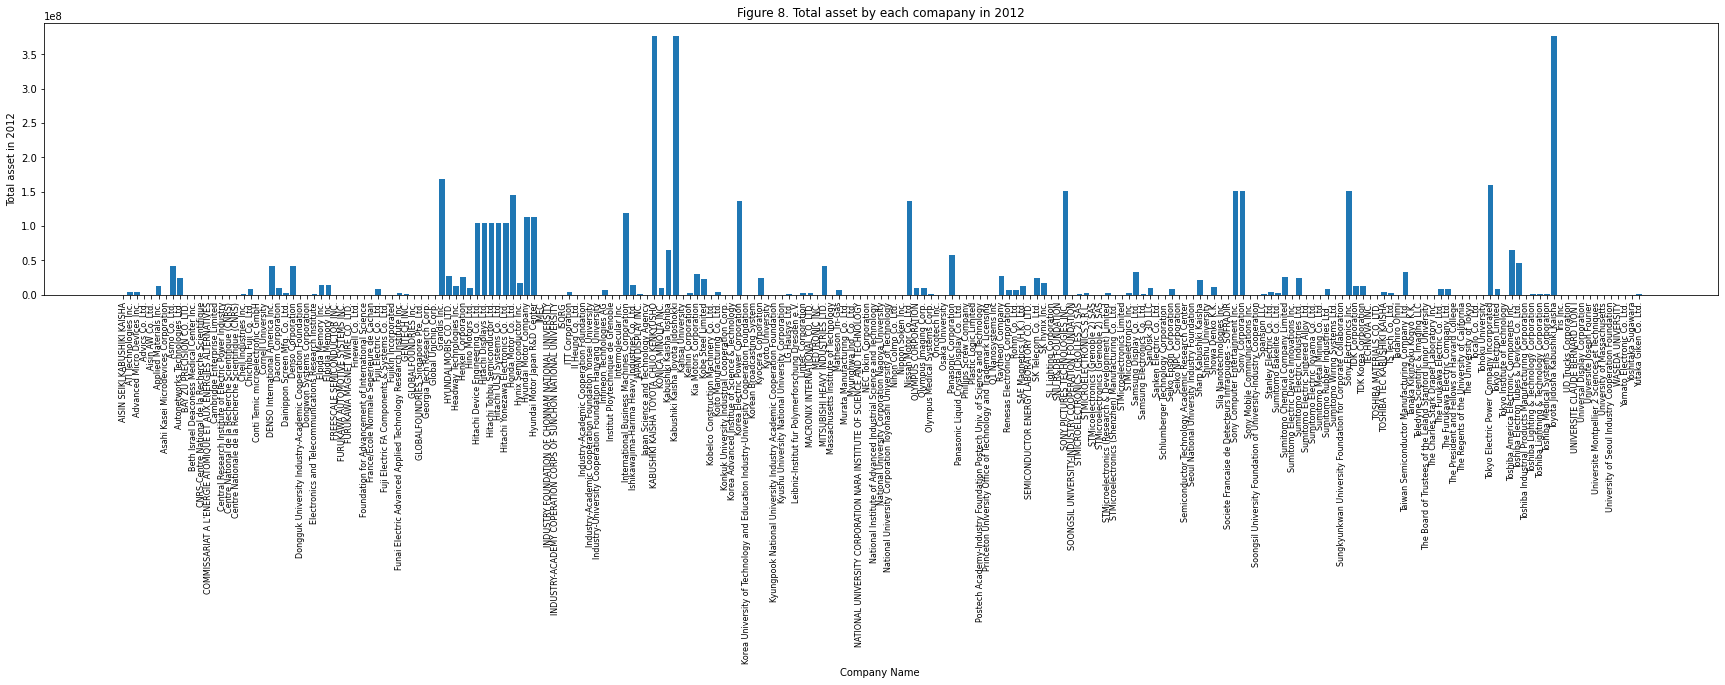

In [25]:
keys = [company for company, df in df.groupby(['ID'])]
plt.figure(figsize=(30,5))
plt.bar(keys,df.groupby(['ID']).sum()['Total_assets_2012'])
plt.ylabel('Total asset in 2012')
plt.xlabel('Company Name ')
plt.xticks(keys, rotation='vertical', size=8)
plt.title('Figure 8. Total asset by each comapany in 2012')
plt.show()

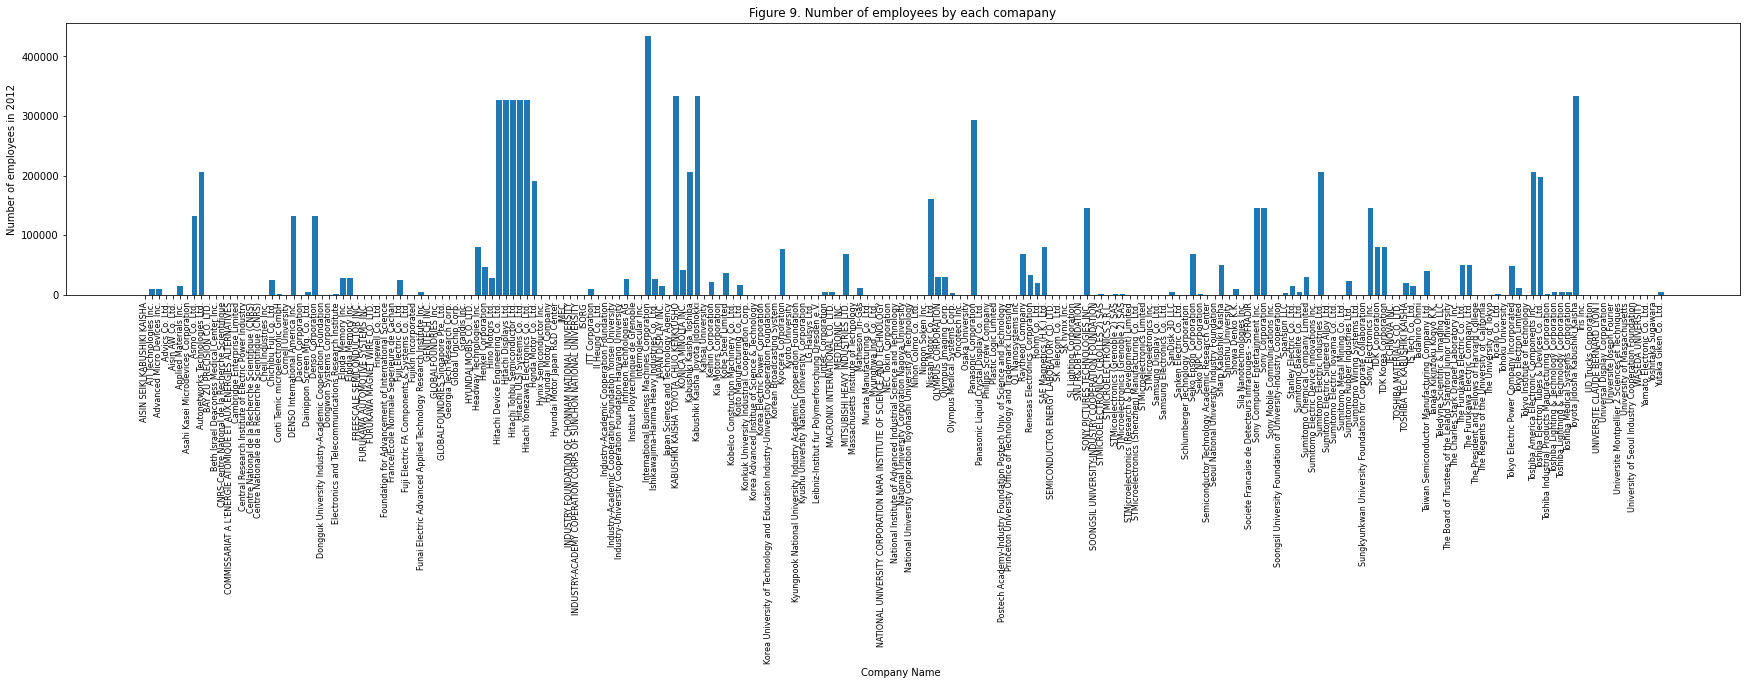

In [26]:

keys = [company for company, df in df.groupby(['ID'])]
plt.figure(figsize=(30,5))
plt.bar(keys,df.groupby(['ID']).sum()['Employees_2012'])
plt.ylabel('Number of employees in 2012')
plt.xlabel('Company Name ')
plt.xticks(keys, rotation='vertical', size=8)
plt.title('Figure 9. Number of employees by each comapany')
plt.show()

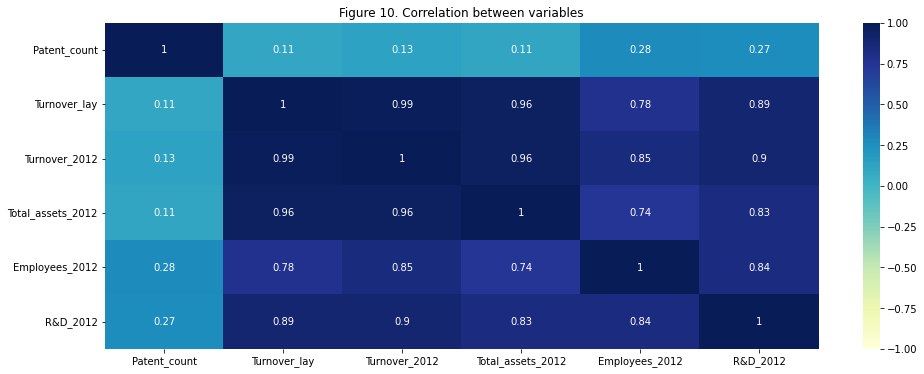

In [27]:
data = df[['Patent_count','Turnover_lay','Turnover_2012','Total_assets_2012', 'Employees_2012','R&D_2012']]
plt.figure(figsize=(16, 6))
corr = data.corr()
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1,cmap="YlGnBu", annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.title('Figure 10. Correlation between variables')

plt.show()

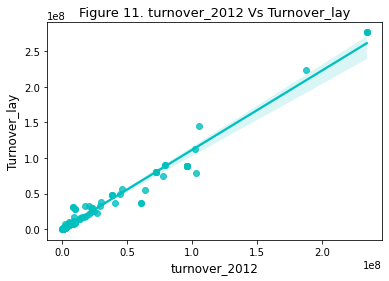

In [28]:
ax = sns.regplot(x=df['Turnover_2012'],y=df['Turnover_lay'],color='c')

#setup the title and the labels of the scatter plot.
ax.set_title("Figure 11. turnover_2012 Vs Turnover_lay",fontsize=13)
ax.set_xlabel("turnover_2012",fontsize=12)
ax.set_ylabel("Turnover_lay",fontsize=12)

#setup the figure size.
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")

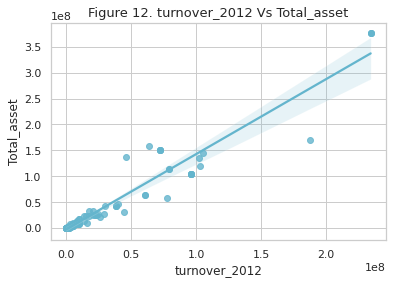

In [29]:
ax = sns.regplot(x=df['Turnover_2012'],y=df['Total_assets_2012'],color='c')

#setup the title and the labels of the scatter plot.
ax.set_title("Figure 12. turnover_2012 Vs Total_asset",fontsize=13)
ax.set_xlabel("turnover_2012",fontsize=12)
ax.set_ylabel("Total_asset",fontsize=12)

#setup the figure size.
sns.set(rc={'figure.figsize':(6,4)})
sns.set_style("whitegrid")

## Discuss the implication of industry and country environments on the innovation strategy of the firm (400 words)